***
## Build Neural Network from Scratch !
### Don't forget to run codes from part_1 if you restarted kernel !

In [29]:
class NeuralNetwork(object):
    # Define structure of NN, create placeholders
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Setting number of nodes
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        self.learning_rate = learning_rate
        
        # Setting initial weights
        #np.random.normal(mean, sd, size)
        self.weights_input_hidden = np.random.normal(0.0,
                                                     self.input_nodes ** -0.5,
                                                    (self.input_nodes,self.hidden_nodes))
        self.weights_hidden_output = np.random.normal(0.0,
                                                     self.hidden_nodes ** -0.5,
                                                    (self.hidden_nodes,self.output_nodes))
        # sigmoid function
        self.sigmoid = lambda x : 1 / (1 + np.exp(-x))
    
    # Forward pass / Backward pass / Weights updates
    def train(self, features, targets):
        n_records = features.shape[0]
        # Set placeholder for weight changes
        delta_weights_input_hidden = np.zeros(self.weights_input_hidden.shape)
        delta_weights_hidden_output = np.zeros(self.weights_hidden_output.shape)
        
        # Forward/Backward pass for each records
        for X, y in zip(features, targets):
            ## Forward pass - input-hidden
            hidden_inputs = np.dot(X, self.weights_input_hidden)
            hidden_outputs = self.sigmoid(hidden_inputs)
            
            ## Forward pass - hidden-output
            outputs= np.dot(hidden_outputs, self.weights_hidden_output)
            
            ## Backward pass
            #  Caclulate error on each layers
            error = y - outputs
            hidden_error = np.dot(self.weights_hidden_output, error)
            
            # Calculate errors_term for each layer
            output_error_term = error # derivative of 'f(x) = x' is '1'
            # The node in hidden layer with bigger weights has bigger "impact" on output 
            # which means has bigger contribution on "error"
            hidden_error_term = hidden_error * hidden_outputs * (1 - hidden_outputs)
            
            ## stack the weight steps 
            delta_weights_input_hidden += hidden_error_term * X[:, None]
            delta_weights_hidden_output += output_error_term * hidden_outputs[:, None]
        
        # Gradient descent, update weights
        self.weights_input_hidden += self.learning_rate * delta_weights_input_hidden / n_records
        self.weights_hidden_output += self.learning_rate * delta_weights_hidden_output / n_records
    
    # Returns prediction using input
    def run(self, features):
        # Run forward pass, returns predict y value 
        hidden_inputs = np.dot(features, self.weights_input_hidden)
        hidden_outputs = self.sigmoid(hidden_inputs)
        
        outputs = np.dot(hidden_outputs, self.weights_hidden_output)
        return outputs                                                     

In [30]:
# Returns 'Mean Squared Error'
def MSE(y, Y):
    return np.mean((y-Y)**2)

In [31]:
import sys

### Set the hyperparameters here ###
iterations = 6000
learning_rate =  0.01
hidden_nodes = 32
output_nodes = 1

input_nodes = train_inputs.shape[1]
network = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
for ii in range(iterations):
    # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(train_inputs.index, size=128)
    X, y = train_inputs.loc[batch].values, train_outputs.loc[batch]
                             
    network.train(X, y)
    
    # Printing out the training progress
    train_loss = MSE(network.run(train_inputs).T, train_outputs.values)
    val_loss = MSE(network.run(valid_inputs).T, valid_outputs.values)
    sys.stdout.write("\rProgress: {:2.1f}".format(100 * ii/float(iterations)) \
                     + "% ... Training loss: " + str(train_loss)[:5] \
                     + " ... Validation loss: " + str(val_loss)[:5])
    sys.stdout.flush()
    
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)

Progress: 100.0% ... Training loss: 0.449 ... Validation loss: 0.452

## Let's see how does our model's prediction look like.


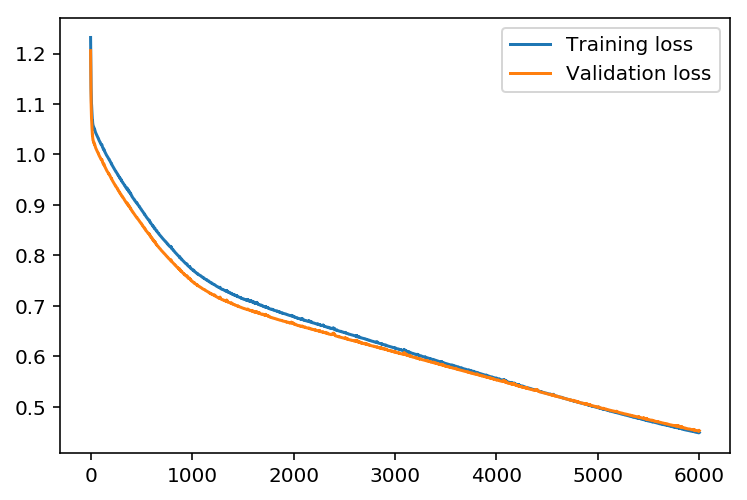

In [32]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim()

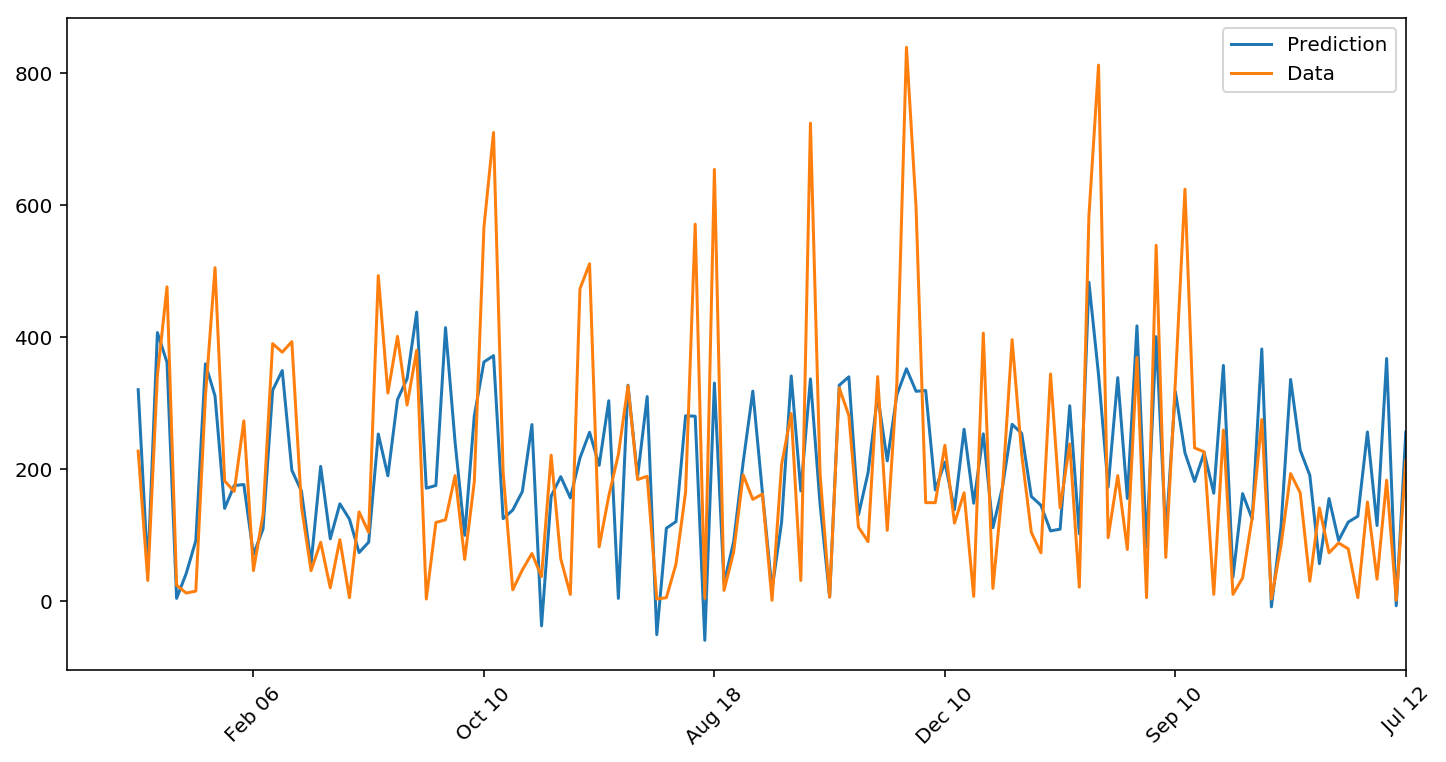

In [33]:
# Let's plot our first 150 data points 
fig, ax = plt.subplots(figsize=(12,6))
mean, std = scaled_features['count']
predictions = network.run(valid_inputs).T*std + mean
ax.plot(predictions[0][:150], label='Prediction')
ax.plot((valid_outputs*std + mean).values[:150], label='Data')
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(rides.loc[valid_outputs.index[:150]]['datetime'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

## Result looks good !
x-axis seems bit odd,  it is because we shuffle the data when we split data into  train/valid sets
***